In [1]:
%matplotlib inline

In [97]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
from six.moves import urllib
import zipfile
import datetime
import sys
import requests
from io import StringIO, BytesIO
from utils import load_data

In [31]:
# sys.path.append('utils/')

In [21]:
#download_data()

In [5]:
data = load_data('./data/train_FD004.txt')

Loaded data with:
61249 Recordings
249 Engines
21 Sensor Measurements
3 Operational Settings


In [6]:
data.head()

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index,time
index,,,,,,,,,,,,,,,,,,,,,
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61249 entries, 0 to 61248
Data columns (total 28 columns):
engine_no                61249 non-null int64
time_in_cycles           61249 non-null int64
operational_setting_1    61249 non-null float64
operational_setting_2    61249 non-null float64
operational_setting_3    61249 non-null float64
sensor_measurement_1     61249 non-null float64
sensor_measurement_2     61249 non-null float64
sensor_measurement_3     61249 non-null float64
sensor_measurement_4     61249 non-null float64
sensor_measurement_5     61249 non-null float64
sensor_measurement_6     61249 non-null float64
sensor_measurement_7     61249 non-null float64
sensor_measurement_8     61249 non-null float64
sensor_measurement_9     61249 non-null float64
sensor_measurement_10    61249 non-null float64
sensor_measurement_11    61249 non-null float64
sensor_measurement_12    61249 non-null float64
sensor_measurement_13    61249 non-null float64
sensor_measurement_14    61249 

In [8]:
ops_cols = [col for col in data.columns if 'operational' in col]
print(ops_cols)

['operational_setting_1', 'operational_setting_2', 'operational_setting_3']


In [9]:
ops_frame = data[ops_cols]

In [10]:
import seaborn as sns

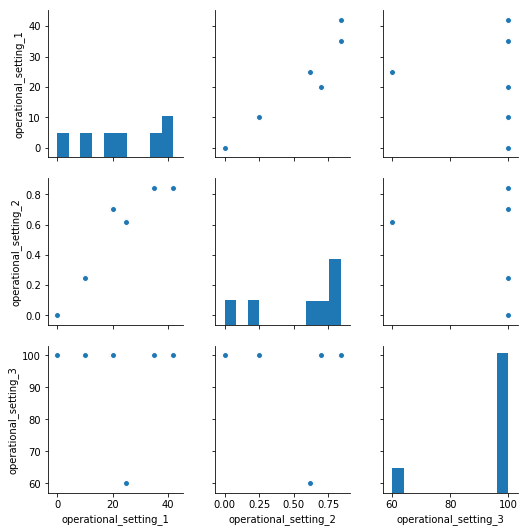

In [11]:
sns.pairplot(data=ops_frame)

In [22]:
from sklearn.cluster import KMeans
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(ops_frame)

ops_frame['settings_clusters'] = kmeans.predict(ops_frame)

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
engine1 = data[data['engine_no'] == 1]
engine2 = data[data['engine_no'] == 2]

In [30]:
print("Number of cycles recorded for engine 1: {0}\nNumber of cycles recorded for engine 2: {1}".format(engine1.time_in_cycles.count(),engine2.time_in_cycles.count()))

Number of cycles recorded for engine 1: 321
Number of cycles recorded for engine 2: 299


In [35]:
cycles = []
for i in range(249):
    engine = data[data['engine_no'] == i+1]
    cycles.append(engine.time_in_cycles.count())
    print("Number of recorded cycles for engine {0}: {1}".format(int(i+1), engine.time_in_cycles.count()))

Number of recorded cycles for engine 1: 321
Number of recorded cycles for engine 2: 299
Number of recorded cycles for engine 3: 307
Number of recorded cycles for engine 4: 274
Number of recorded cycles for engine 5: 193
Number of recorded cycles for engine 6: 331
Number of recorded cycles for engine 7: 221
Number of recorded cycles for engine 8: 230
Number of recorded cycles for engine 9: 334
Number of recorded cycles for engine 10: 354
Number of recorded cycles for engine 11: 301
Number of recorded cycles for engine 12: 272
Number of recorded cycles for engine 13: 256
Number of recorded cycles for engine 14: 253
Number of recorded cycles for engine 15: 224
Number of recorded cycles for engine 16: 184
Number of recorded cycles for engine 17: 151
Number of recorded cycles for engine 18: 343
Number of recorded cycles for engine 19: 210
Number of recorded cycles for engine 20: 245
Number of recorded cycles for engine 21: 227
Number of recorded cycles for engine 22: 211
Number of recorded 

Number of recorded cycles for engine 187: 273
Number of recorded cycles for engine 188: 254
Number of recorded cycles for engine 189: 239
Number of recorded cycles for engine 190: 381
Number of recorded cycles for engine 191: 297
Number of recorded cycles for engine 192: 190
Number of recorded cycles for engine 193: 197
Number of recorded cycles for engine 194: 145
Number of recorded cycles for engine 195: 159
Number of recorded cycles for engine 196: 174
Number of recorded cycles for engine 197: 170
Number of recorded cycles for engine 198: 164
Number of recorded cycles for engine 199: 176
Number of recorded cycles for engine 200: 225
Number of recorded cycles for engine 201: 378
Number of recorded cycles for engine 202: 241
Number of recorded cycles for engine 203: 324
Number of recorded cycles for engine 204: 211
Number of recorded cycles for engine 205: 242
Number of recorded cycles for engine 206: 263
Number of recorded cycles for engine 207: 379
Number of recorded cycles for engi

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


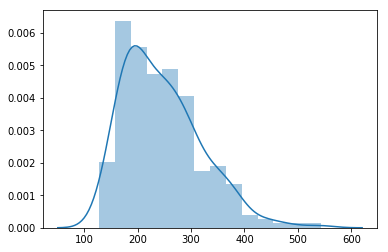

In [36]:
sns.distplot(cycles)

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


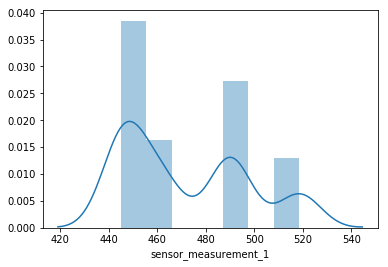

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


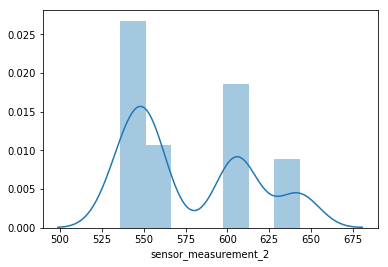

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


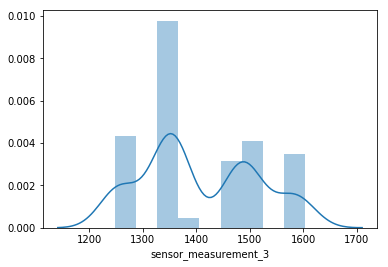

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


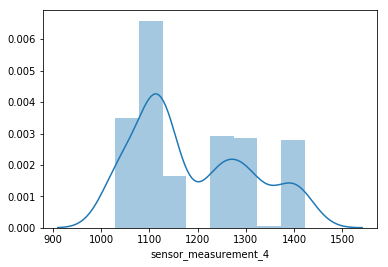

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


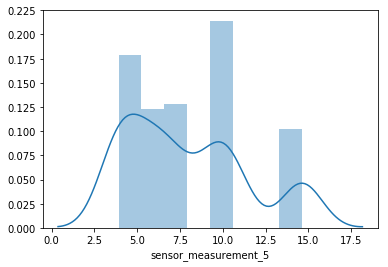

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


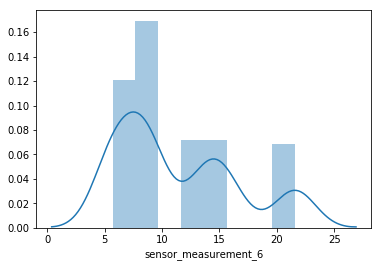

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


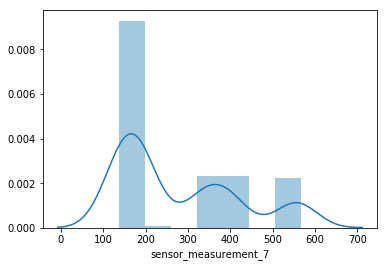

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


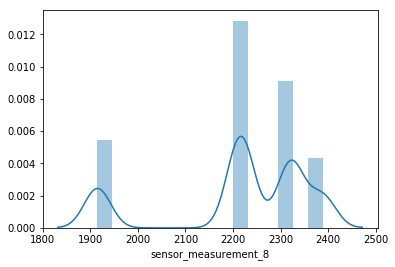

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


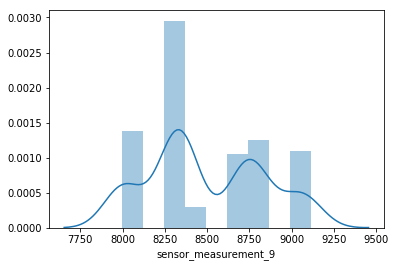

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


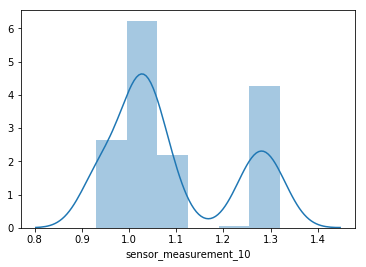

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


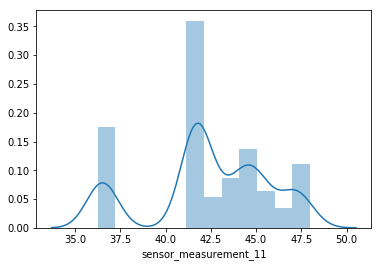

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


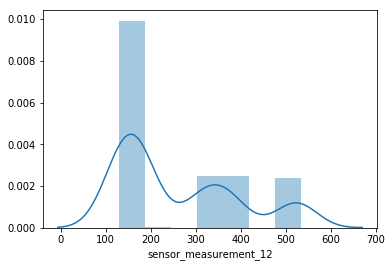

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


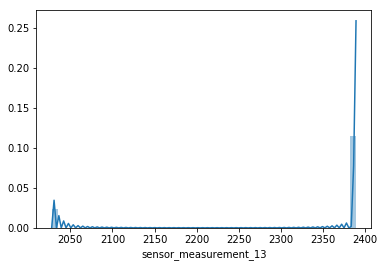

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


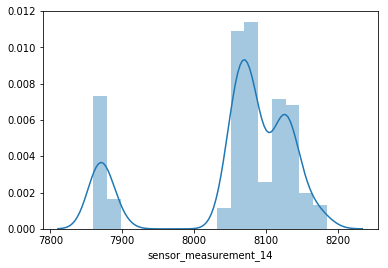

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


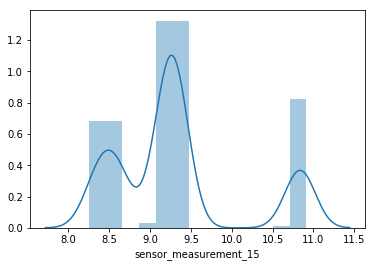

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


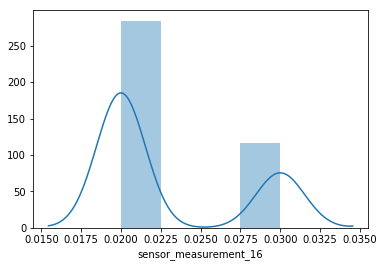

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


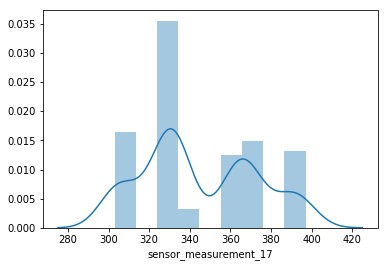

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


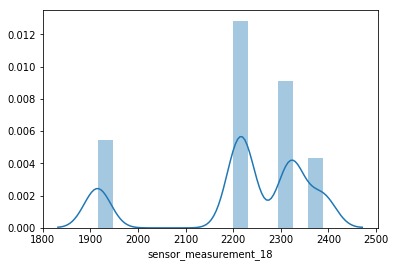

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


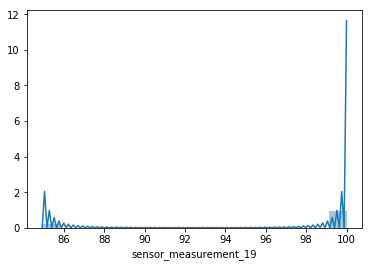

C:\Users\jg568_000\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


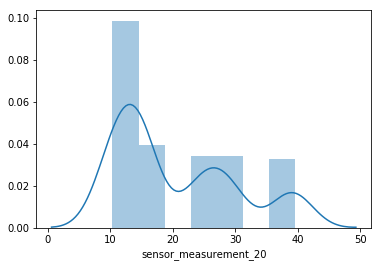

In [66]:
for i in range(1,21):
    sens = engine1['sensor_measurement_{}'.format(i)]
    sns.distplot(sens)
    plt.show()

In [ ]:
sens_cols = [c for c in engine1.columns if 'sensor' in c]
sns.pairplot(engine1[sens_cols])

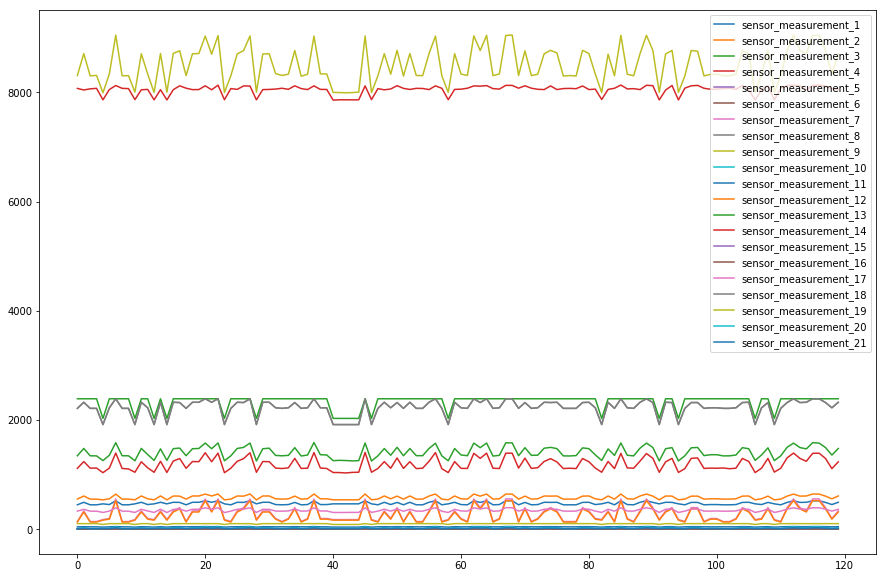

In [75]:
plt.figure(figsize=(15,10))
plt.plot(engine1[sens_cols].iloc[0:120])
plt.legend(engine1[sens_cols].columns)

In [95]:
sen419 = [sens_cols[3], sens_cols[8
                                 ]]

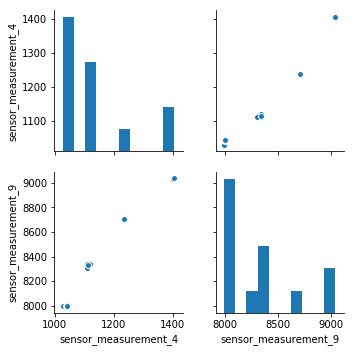

In [96]:
eng_flt = engine1[sen419].iloc[37:50]
sns.pairplot(eng_flt)

In [77]:
dcorr = data.corr(method='pearson')

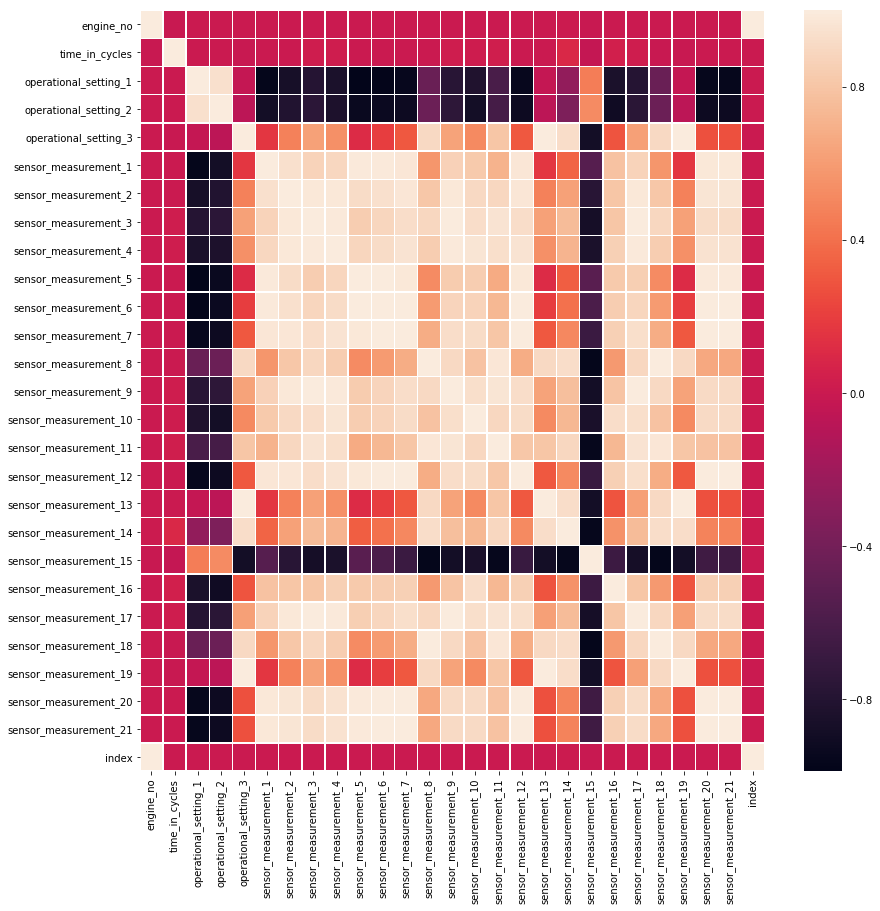

In [78]:
dims = (14,14)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(dcorr, linewidths=0.5)